# Group Project 22

*Group Members: Angelique Clara Hanzell, Jack Parkinson, Edward Liang, Vamsi Nadella*

## Question

We are trying to see whether or not a person was tased before being shot based on factors like race and threat level.

WHAT TA GAVE US:
group by race and threat_level and find proportion of being shot/shot and tased. Then, analyze the proportions to see if they differ (racism) or not (no racism)

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
ShootingData <- read.csv('https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv')

head(ShootingData)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True


In [3]:
ShootingPop <- ShootingData %>%
    filter(race != '',
          threat_level != 'undetermined') %>% 
    select(manner_of_death, race, threat_level)

head(ShootingPop)

,manner_of_death,race,threat_level
,<chr>,<chr>,<chr>
1,shot,A,attack
2,shot,W,attack
3,shot and Tasered,H,other
4,shot,W,attack
5,shot,H,attack
6,shot,W,attack


In [11]:
ShotOnlyNums <- ShootingPop %>% 
    group_by(race, threat_level) %>% 
    summarise(p = sum(manner_of_death == 'shot')/n())

ShotAndTasedNums <- ShootingPop %>% 
    group_by(race, threat_level) %>% 
    summarise(p = sum(manner_of_death == 'shot and Tasered')/n())

head(ShotOnlyNums)
head(ShotAndTasedNums)

`summarise()` has grouped output by 'race'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'race'. You can override using the
`.groups` argument.


race,threat_level,p
<chr>,<chr>,<dbl>
A,attack,0.9322034
A,other,0.9183673
B,attack,0.9612961
B,other,0.9171717
H,attack,0.9568567
H,other,0.9351852


race,threat_level,p
<chr>,<chr>,<dbl>
A,attack,0.06779661
A,other,0.08163265
B,attack,0.03870387
B,other,0.08282828
H,attack,0.04314330
H,other,0.06481481


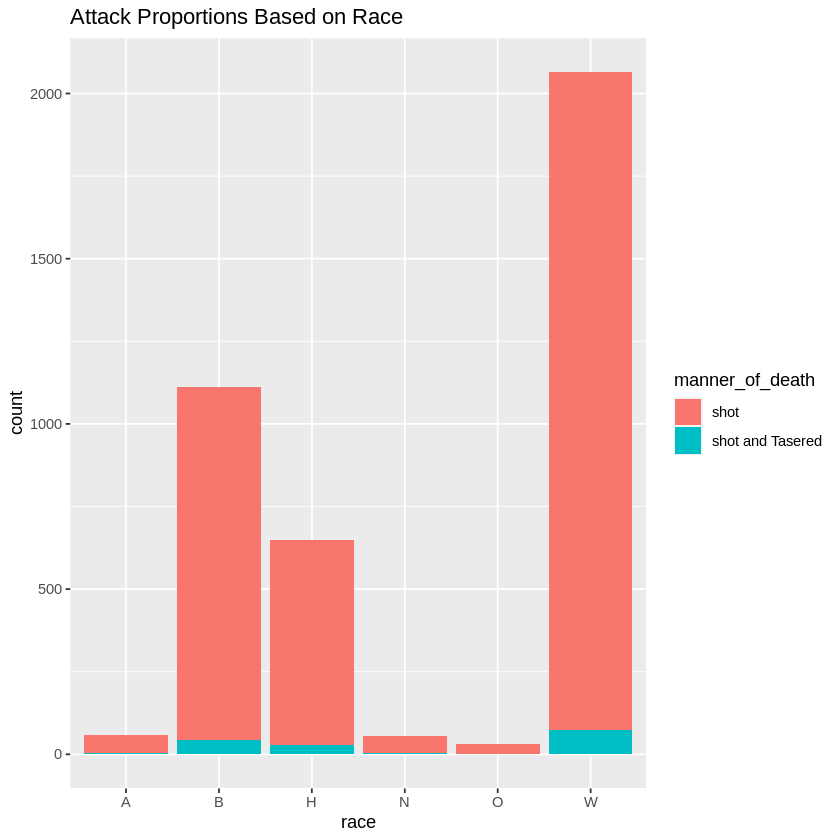

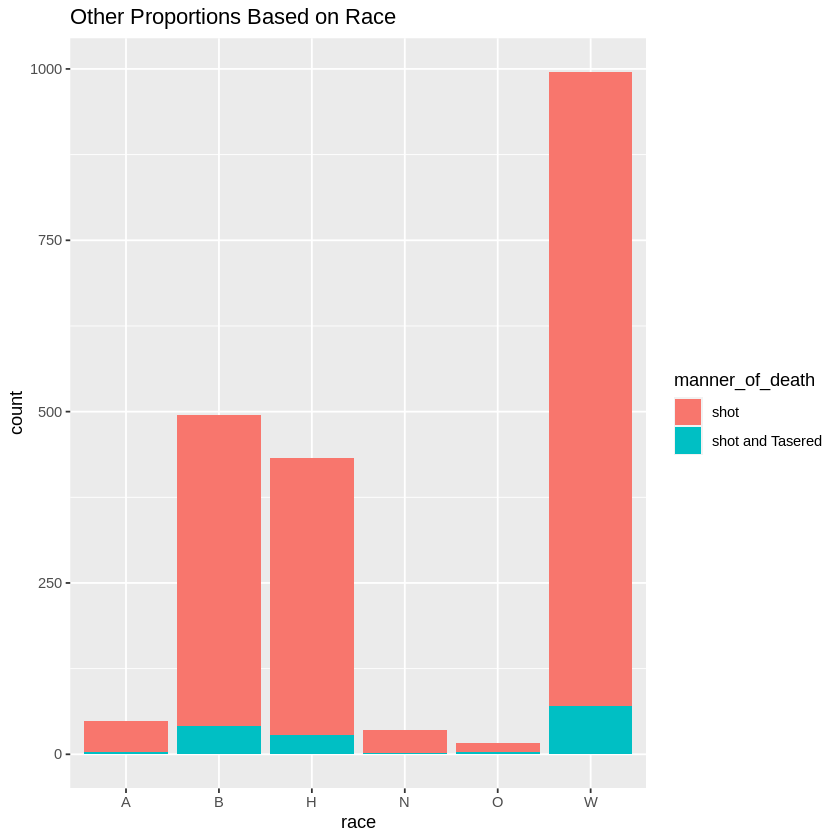

In [10]:
PlottingAttack <- ShootingPop %>%
    filter(threat_level == 'attack') %>% 
    group_by(race) %>% 
    ggplot(aes(x = race, fill = manner_of_death)) +
    geom_bar() +
    ggtitle("Attack Proportions Based on Race")

PlottingOther <- ShootingPop %>% 
    filter(threat_level == 'other') %>% 
    group_by(race) %>% 
    ggplot(aes(x = race, fill = manner_of_death)) +
    geom_bar() +
    ggtitle("Other Proportions Based on Race")

PlottingAttack
PlottingOther